In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import random

In [2]:
random_state = 42
batch_size = 16
num_epochs = 200
patience = 10
learining_rate = 0.001

table_name = 'cybersequrity.csv'
target = 'Class'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [4]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_seed(random_state)

In [5]:
data = pd.read_csv(table_name)

In [6]:
data.head()

,svcscan.fs_drivers,callbacks.ngeneric,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_eprocess_pool,callbacks.nanonymous,psxview.not_in_session,psxview.not_in_pslist,psxview.not_in_pspcid_list,psxview.not_in_ethread_pool,psxview.not_in_csrss_handles,psxview.not_in_pslist_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_deskthrd,psxview.not_in_ethread_pool_false_avg,psxview.not_in_session_false_avg,Class
0,26,8,0.0,0,0,2,0,0,0,4,0.000000,0.000000,6,0.000000,0.044444,1
1,26,8,0.0,0,0,5,3,3,3,7,0.073171,0.073171,9,0.073171,0.121951,1
2,26,8,0.0,0,0,9,7,7,7,11,0.152174,0.152174,13,0.152174,0.195652,1
3,26,8,0.0,0,0,3,1,1,2,6,0.022222,0.022222,9,0.044444,0.066667,1
4,26,8,0.0,0,0,2,0,0,0,4,0.000000,0.000000,6,0.000000,0.048780,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   svcscan.fs_drivers                      10000 non-null  int64  
 1   callbacks.ngeneric                      10000 non-null  int64  
 2   psxview.not_in_eprocess_pool_false_avg  10000 non-null  float64
 3   psxview.not_in_eprocess_pool            10000 non-null  int64  
 4   callbacks.nanonymous                    10000 non-null  int64  
 5   psxview.not_in_session                  10000 non-null  int64  
 6   psxview.not_in_pslist                   10000 non-null  int64  
 7   psxview.not_in_pspcid_list              10000 non-null  int64  
 8   psxview.not_in_ethread_pool             10000 non-null  int64  
 9   psxview.not_in_csrss_handles            10000 non-null  int64  
 10  psxview.not_in_pslist_false_avg         10000 non-null  flo

In [8]:
data.describe()

,svcscan.fs_drivers,callbacks.ngeneric,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_eprocess_pool,callbacks.nanonymous,psxview.not_in_session,psxview.not_in_pslist,psxview.not_in_pspcid_list,psxview.not_in_ethread_pool,psxview.not_in_csrss_handles,psxview.not_in_pslist_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_deskthrd,psxview.not_in_ethread_pool_false_avg,psxview.not_in_session_false_avg,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.995400,7.999800,0.000069,0.001700,0.000800,3.859000,1.859300,1.85880,2.299500,6.301900,0.040579,0.040569,8.290700,0.047741,0.087565,0.509600
std,0.210198,0.014141,0.001133,0.041198,0.028274,3.016625,3.016623,3.01645,4.827249,4.828653,0.057255,0.057253,4.945568,0.067768,0.054770,0.499933
min,11.000000,7.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.011834,0.000000
25%,26.000000,8.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,6.000000,0.000000,0.048780,0.000000
50%,26.000000,8.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,1.000000,5.000000,0.020997,0.020997,7.000000,0.023256,0.066667,1.000000
75%,26.000000,8.000000,0.000000,0.000000,0.000000,5.000000,3.000000,3.00000,3.000000,7.000000,0.068182,0.068182,9.000000,0.071429,0.113636,1.000000
max,26.000000,8.000000,0.027778,1.000000,1.000000,37.000000,35.000000,35.00000,139.000000,143.000000,0.500000,0.500000,145.000000,0.771084,0.528571,1.000000


In [9]:
X = data.drop(target, axis=1).values
y = data[target].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.4,
    stratify=y,
    random_state=random_state
)

X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val,
    test_size=0.5,
    stratify=y_val,
    random_state=random_state
)

print("Train set size:", X_train.shape, y_train.shape)
print("Val set size:  ", X_val.shape, y_val.shape)
print("Test set size: ", X_test.shape, y_test.shape)

Train set size: (6000, 15) (6000,)
Val set size:   (2000, 15) (2000,)
Test set size:  (2000, 15) (2000,)


In [10]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [11]:
class CiberSecurityDataset(Dataset):
    def __init__(self, features, labels):
        self.X = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(labels, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [12]:
train_dataset = CiberSecurityDataset(X_train, y_train)
val_dataset = CiberSecurityDataset(X_val, y_val)
test_dataset = CiberSecurityDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [13]:
class MalwareDetectionModel(nn.Module):
    """
    A simple MLP with several Linear layers, ReLU activations,
    and a final Sigmoid for binary classification.
    """
    def __init__(self, input_dim, dropout_p=0.5):
        super(MalwareDetectionModel, self).__init__()
        self.fc1      = nn.Linear(input_dim, 128)
        self.relu1    = nn.ReLU()
        
        self.fc2      = nn.Linear(128, 64)
        self.relu2    = nn.ReLU()
        
        self.fc3      = nn.Linear(64, 32)
        self.relu3    = nn.ReLU()
        
        self.fc4      = nn.Linear(32, 16)
        self.relu4    = nn.ReLU()
        
        self.fc5      = nn.Linear(16, 1)
        self.sigmoid  = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        
        x = self.relu2(self.fc2(x))
        
        x = self.relu3(self.fc3(x))
        
        x = self.relu4(self.fc4(x))
        
        x = self.sigmoid(self.fc5(x))
        return x

In [14]:
input_dim = X_train.shape[1]
model = MalwareDetectionModel(input_dim=input_dim, dropout_p=0.5).to(device)

print(model)

MalwareDetectionModel(
  (fc1): Linear(in_features=15, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (relu4): ReLU()
  (fc5): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [15]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learining_rate)


In [16]:
train_losses = []
val_losses   = []

best_val_loss    = float('inf')
best_model_state = None
trigger_times    = 0

for epoch in range(num_epochs):
    # --- TRAINING ---
    model.train()
    running_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item() * X_batch.size(0)
    
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # --- VALIDATION ---
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_val_loss += loss.item() * X_batch.size(0)

    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    # Early Stopping Check
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f"\nEarly stopping triggered at epoch {epoch+1}.")
            break

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f}")

Epoch [1/200] Train Loss: 0.6568 | Val Loss: 0.6320
Epoch [2/200] Train Loss: 0.5869 | Val Loss: 0.5240
Epoch [3/200] Train Loss: 0.5126 | Val Loss: 0.5255
Epoch [4/200] Train Loss: 0.4786 | Val Loss: 0.4573
Epoch [5/200] Train Loss: 0.4658 | Val Loss: 0.4448
Epoch [6/200] Train Loss: 0.4549 | Val Loss: 0.4493
Epoch [7/200] Train Loss: 0.4452 | Val Loss: 0.4319
Epoch [8/200] Train Loss: 0.4468 | Val Loss: 0.4187
Epoch [9/200] Train Loss: 0.4385 | Val Loss: 0.4219
Epoch [10/200] Train Loss: 0.4255 | Val Loss: 0.4242
Epoch [11/200] Train Loss: 0.4190 | Val Loss: 0.3987
Epoch [12/200] Train Loss: 0.4153 | Val Loss: 0.4074
Epoch [13/200] Train Loss: 0.4058 | Val Loss: 0.4057
Epoch [14/200] Train Loss: 0.4032 | Val Loss: 0.4038
Epoch [15/200] Train Loss: 0.3994 | Val Loss: 0.4001
Epoch [16/200] Train Loss: 0.3944 | Val Loss: 0.3879
Epoch [17/200] Train Loss: 0.4035 | Val Loss: 0.3805
Epoch [18/200] Train Loss: 0.3981 | Val Loss: 0.4159
Epoch [19/200] Train Loss: 0.3939 | Val Loss: 0.3851
Ep

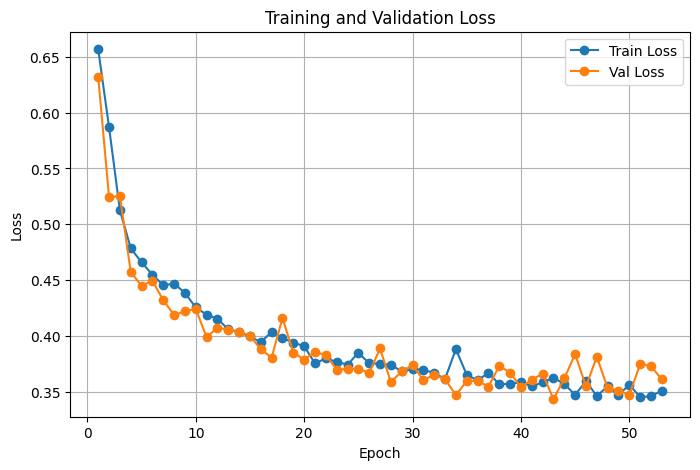

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, len(val_losses)+1),   val_losses,   label='Val Loss',   marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
model.load_state_dict(best_model_state)
model.eval()

all_probs  = []
all_preds  = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = model(X_batch)
        probs   = outputs.cpu().numpy().flatten()
        preds   = (probs >= 0.5).astype(int)

        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(y_batch.cpu().numpy().flatten())

# Calculate ROC-AUC
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

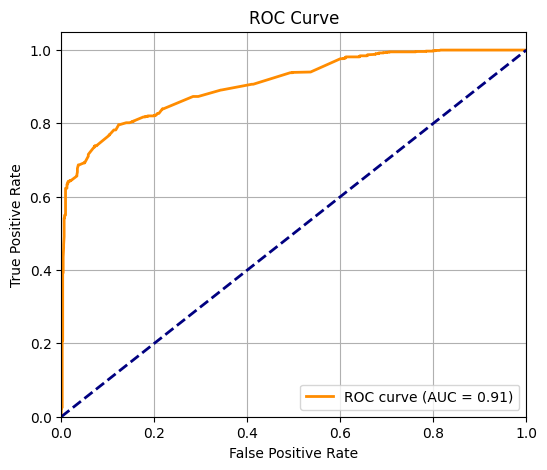

In [19]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [20]:
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       981
         1.0       0.86      0.80      0.83      1019

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



In [33]:
# Another try
patience = 20
learining_rate = 0.0001
num_epochs = 400

class MalwareDetectionDropOutModel(nn.Module):
    """
    A simple MLP with several Linear layers, ReLU activations,
    Dropout regularization, and a final Sigmoid for binary classification.
    """
    def __init__(self, input_dim, dropout_p=0.5):
        super(MalwareDetectionDropOutModel, self).__init__()
        self.fc1      = nn.Linear(input_dim, 128)
        self.relu1    = nn.ReLU()
        self.dropout1 = nn.Dropout(p=dropout_p)
        
        self.fc2      = nn.Linear(128, 64)
        self.relu2    = nn.ReLU()
        self.dropout2 = nn.Dropout(p=dropout_p)
        
        self.fc3      = nn.Linear(64, 32)
        self.relu3    = nn.ReLU()
        self.dropout3 = nn.Dropout(p=dropout_p)
        
        self.fc4      = nn.Linear(32, 16)
        self.relu4    = nn.ReLU()
        self.dropout4 = nn.Dropout(p=dropout_p)
        
        self.fc5      = nn.Linear(16, 1)
        self.sigmoid  = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        
        x = self.sigmoid(self.fc5(x))
        return x

In [34]:
input_dim = X_train.shape[1]
model = MalwareDetectionDropOutModel(input_dim=input_dim, dropout_p=0.5).to(device)

print(model)

MalwareDetectionDropOutModel(
  (fc1): Linear(in_features=15, out_features=128, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (relu4): ReLU()
  (dropout4): Dropout(p=0.5, inplace=False)
  (fc5): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [35]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learining_rate)

In [36]:
train_losses = []
val_losses   = []

best_val_loss    = float('inf')
best_model_state = None
trigger_times    = 0

for epoch in range(num_epochs):
    # --- TRAINING ---
    model.train()
    running_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        running_train_loss += loss.item() * X_batch.size(0)
    
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # --- VALIDATION ---
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_val_loss += loss.item() * X_batch.size(0)

    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    # Early Stopping Check
    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        best_model_state = model.state_dict()
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print(f"\nEarly stopping triggered at epoch {epoch+1}.")
            break

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {epoch_train_loss:.4f} | Val Loss: {epoch_val_loss:.4f}")

Epoch [1/400] Train Loss: 0.6941 | Val Loss: 0.6924
Epoch [2/400] Train Loss: 0.6928 | Val Loss: 0.6914
Epoch [3/400] Train Loss: 0.6922 | Val Loss: 0.6903
Epoch [4/400] Train Loss: 0.6916 | Val Loss: 0.6892
Epoch [5/400] Train Loss: 0.6906 | Val Loss: 0.6877
Epoch [6/400] Train Loss: 0.6893 | Val Loss: 0.6858
Epoch [7/400] Train Loss: 0.6890 | Val Loss: 0.6840
Epoch [8/400] Train Loss: 0.6863 | Val Loss: 0.6818
Epoch [9/400] Train Loss: 0.6854 | Val Loss: 0.6795
Epoch [10/400] Train Loss: 0.6828 | Val Loss: 0.6773
Epoch [11/400] Train Loss: 0.6799 | Val Loss: 0.6744
Epoch [12/400] Train Loss: 0.6790 | Val Loss: 0.6717
Epoch [13/400] Train Loss: 0.6758 | Val Loss: 0.6680
Epoch [14/400] Train Loss: 0.6762 | Val Loss: 0.6652
Epoch [15/400] Train Loss: 0.6708 | Val Loss: 0.6622
Epoch [16/400] Train Loss: 0.6695 | Val Loss: 0.6589
Epoch [17/400] Train Loss: 0.6680 | Val Loss: 0.6562
Epoch [18/400] Train Loss: 0.6693 | Val Loss: 0.6550
Epoch [19/400] Train Loss: 0.6662 | Val Loss: 0.6523
Ep

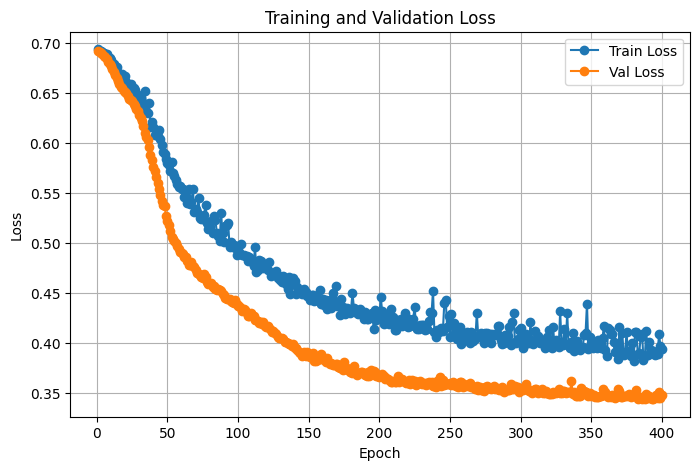

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, len(val_losses)+1),   val_losses,   label='Val Loss',   marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
model.load_state_dict(best_model_state)
model.eval()

all_probs  = []
all_preds  = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = model(X_batch)
        probs   = outputs.cpu().numpy().flatten()
        preds   = (probs >= 0.5).astype(int)

        all_probs.extend(probs)
        all_preds.extend(preds)
        all_labels.extend(y_batch.cpu().numpy().flatten())

# Calculate ROC-AUC
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

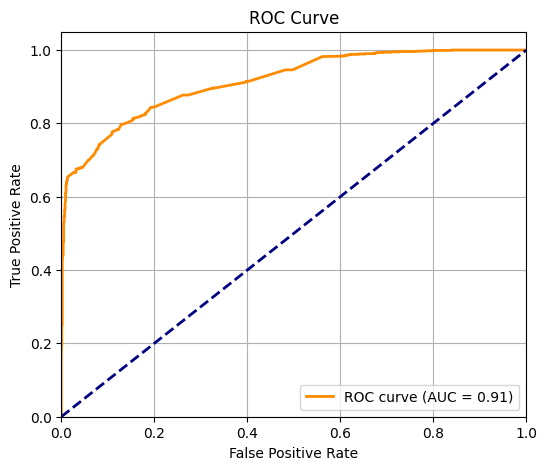

In [39]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [40]:
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       981
         1.0       0.88      0.78      0.83      1019

    accuracy                           0.83      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.84      0.83      0.83      2000

